In [4]:
import numpy as np
from pathlib import Path
import sys
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

sys.path.append('../../bitome2/')
sys.path.append('../')
sys.path.append('../../bitome2_workflows/DnaFeaturesViewer-master/')


from bitome.core import Bitome
from feature_functions import *
from dna_features_viewer import CircularGraphicRecord, GraphicFeature, GraphicRecord

In [5]:
# K12 MG1655 Genebank

K12_DATA_PATH = Path('../data/bitome2/mg1655')

In [9]:
# from GenBank annotation
origin = (3925743, 3925975)
# from 1. Duggin, I. G. & Bell, S. D. J. Mol. Biol. (2009). with the following terA/terC sequences:
# ter_a = 'AATTAGTATGTTGTAACTAAAGT'
# ter_c = 'ATATAGGATGTTGTAACTAATAT'
terminus = (1341745, 1609180)
cid_boundaries = [50000, 142779, 223485, 446815, 927474, 985894, 1080000, 1195008, 1301085, 1577657,
                 1799393, 1852621, 2102875, 2259719, 2380722, 2533498, 2726069, 2905711, 2996372, 3297098,
                 3423423, 3440040, 3652182, 3811250, 3941516, 4035239, 4166484, 4470986]

In [10]:
mg1655 = Bitome(
    Path(K12_DATA_PATH, 'NC_000913.3.gb'),
    name='MG1655',
    origin=origin, terminus=terminus,
    cid_boundaries=cid_boundaries,
    gene_table=Path(K12_DATA_PATH, 'gene_info_supp.csv'),
    tu_table=Path(K12_DATA_PATH, 'tu.csv'),
    operon_table=Path(K12_DATA_PATH, 'operon.csv'),
    tss_table=Path(K12_DATA_PATH, 'tss.csv'),
    # TODO PARSE TTS data
    tts_table=None,
    tfbs_table=Path(K12_DATA_PATH, 'tfbs.csv'),
    terminator_table=Path(K12_DATA_PATH, 'terminator.csv'),
    attenuator_table=Path(K12_DATA_PATH, 'attenuator.csv'),
    rbs_table=Path(K12_DATA_PATH, 'rbs.csv'),
    riboswitch_table=Path(K12_DATA_PATH, 'riboswitch.csv')
)

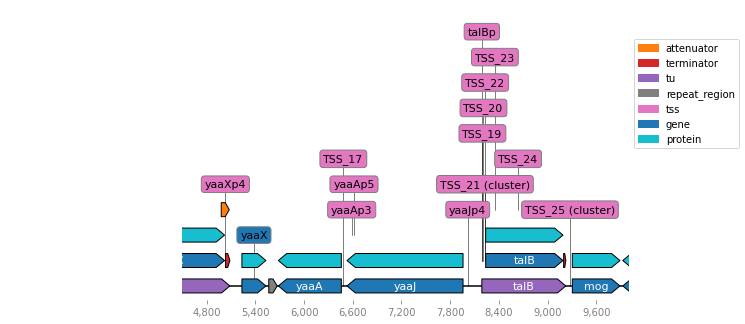

In [6]:
mg1655.view_region(4500, 10000)

In [7]:
SNP_in_promoters = pd.read_csv('SNP_in_promoters_overlap.csv')
SNP_in_promoters.head()

,Unnamed: 0,exp,ale,flask,isolate,tech_rep,presence,Reference Seq,Position,Mutation Type,Details,Sequence Change,Gene,coding,organism
0,109,TOL_hexamethylenediamine,4,50,3,1,1.00,NC_000913,940856,SNP,intergenic (+136/‑103),A→G,serS/dmsA,False,Escherichia coli
1,236,EEP_ndh_nuoB,6,34,0,1,0.25,NC_000913,1157629,SNP,intergenic (+55/‑240),G→C,ycfH/ptsG,False,Escherichia coli
2,0,EEP_ndh_nuoB,6,34,0,1,0.25,NC_000913,1157632,SNP,intergenic (+58/‑237),A→T,ycfH/ptsG,False,Escherichia coli
3,256,EEP_ndh_nuoB,6,34,0,1,0.25,NC_000913,1157633,SNP,intergenic (+59/‑236),A→T,ycfH/ptsG,False,Escherichia coli
4,208,EEP_ndh_nuoB,6,34,0,1,0.23,NC_000913,1157636,SNP,intergenic (+62/‑233),G→C,ycfH/ptsG,False,Escherichia coli


In [8]:
len(SNP_in_promoters['exp'])

2134

In [9]:
len(SNP_in_promoters['Position'])

2134

In [10]:
SNP_in_promoters.loc[0,'Position']

940856

In [11]:
# position number without repeats

position_number = []
for i in range(2134):
    position_number.append(SNP_in_promoters.loc[i,'Position'])
print(position_number)

[940856, 1157629, 1157632, 1157633, 1157636, 2731312, 2731346, 2731346, 2731346, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 223606, 3428954, 3882609, 3882550, 3882609, 711516, 711536, 1671310, 1258523, 595519, 595520, 595519, 595520, 595519, 595520, 595519, 595520, 2662226, 890900, 222731, 3058570, 3058585, 3151425, 3880206, 1764427, 2071321, 2071321, 2071304, 2071304, 2071308, 2071321, 2071321, 4128549, 4128549, 2553210, 2553210, 2553210, 771344, 4166443, 3204189, 3204192, 1263642, 1263618, 1263642, 1263669, 4223638, 4223634, 4223638, 703790, 2832456, 2832456, 765808, 4370614, 4370616, 4370616, 4370616, 4370616, 4554471, 2436937, 2436937, 2436937, 3811222, 3102931, 3104011, 3102931, 3102931, 3104011, 3104011, 4058263, 2942711, 3318344, 3853312, 3296292, 49765, 49765, 49765, 49787, 49765, 49765, 49765, 49787, 49765, 49767, 49765, 49765, 49768, 49765, 49767, 49765, 49765, 49768, 49765, 49767, 49765, 49767, 49765, 49765, 49767, 49765, 49765, 49765, 49768, 49765, 49765

In [12]:
snp_positions = []
for i in range(2134):
     snp_positions.append(SNP_in_promoters.loc[i,'Position'])

snp_positions = pd.concat([pd.DataFrame([i], columns=['Position']) for i in snp_positions],
          ignore_index=True)
snp_positions.head()

,Position
0,940856
1,1157629
2,1157632
3,1157633
4,1157636


In [13]:
features_num = mg1655.features_in_range(snp_positions.loc[5,'Position'],snp_positions.loc[5,'Position']+1).shape[0]
features_num

3

In [14]:
features_nums = []
for i in range(2134):
    features_nums.append(mg1655.features_in_range(snp_positions.loc[i,'Position'],
                                                  snp_positions.loc[i,'Position']+1).shape[0])
print(features_nums)

[2, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 6, 9, 6, 1, 0, 0, 1, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 2, 0, 0, 3, 14, 3, 6, 6, 2, 2, 3, 6, 6, 1, 1, 5, 5, 5, 4, 3, 0, 0, 1, 1, 1, 1, 4, 4, 4, 0, 2, 2, 3, 0, 4, 4, 4, 4, 1, 3, 3, 3, 5, 5, 13, 5, 5, 13, 13, 1, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 7, 7, 7, 0, 5, 5, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 10, 4, 1, 9, 2, 1, 1, 1, 11, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 5, 4, 2, 2, 1, 3, 3, 0, 1, 1, 1, 1, 11, 10, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [15]:
# list of snp_positions with repeats

list_of_snp_positions_with_repeats = []
for i,j in zip(snp_positions['Position'], features_nums):
    list_of_snp_positions_with_repeats += [i] * j
print(list_of_snp_positions_with_repeats)

[940856, 940856, 1157629, 1157632, 1157633, 1157636, 2731312, 2731312, 2731312, 2731346, 2731346, 2731346, 2731346, 2731346, 2731346, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 2731312, 223606, 223606, 223606, 3428954, 3428954, 3882609, 3882609, 3882609, 3882609, 3882609, 3882609, 3882550, 3882550, 3882550, 3882550, 3882550, 3882550, 3882550, 3882550, 3882550, 3882609, 3882609, 3882609, 3882609, 3882609, 3882609, 711516, 1258523, 595519, 595519, 595519, 595519, 595519, 595519, 595519, 595520, 595520, 595520, 595520, 595520, 595520, 595520, 595519, 595519, 595519, 595519, 595519, 595519, 595519, 595520, 595520, 595520, 595520, 595520, 595520, 595520, 595519, 595519, 595519, 595519, 595519, 595519, 595519, 595520, 595520, 595520, 595520, 595520, 595520, 595520, 595519, 595519, 595519, 595519, 595519, 595519, 595519, 595520, 595520, 595520, 595520, 59552

In [16]:
# exp names without repeats
exp_names = []
for i in range(2134):
    exp_names.append(SNP_in_promoters.loc[i,'exp'])
print(exp_names)

['TOL_hexamethylenediamine', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', '42C', 'C321', 'C321', 'C321', 'HOT', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HUG', 'ECNR2.1', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'HOT', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'BOP27-M9-NC_000913_3gb-log-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'CCK_pgi', 'BOP27-M9-NC_000913_3gb-log-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'SSW_GLU_XYL', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'C321.∆A.earlyfix', 'Bop_27_TPP', 'HOT_dnaQ', 'HOT', 'HOT_dnaQ', 'C321.∆A.earlyfix', 'TOL_2,3-butanediol', 'GLU_16321-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', '42C', '42C', 'ECNR2.1', 'ECNR2.1', 'ECNR2.1', 'HOT_dnaQ', 'HOT_dnaQ', 'TOL_hexamethylenediamine', 'TOL_hexamethylenediamine', 'HOT_mutL', 'HOT_mut

In [17]:
# list of exp_names with repeats

list_of_exp_names_with_repeats = []
for i,j in zip(exp_names, features_nums):
    list_of_exp_names_with_repeats += [i] * j
print(list_of_exp_names_with_repeats)

['TOL_hexamethylenediamine', 'TOL_hexamethylenediamine', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', 'EEP_ndh_nuoB', '42C', '42C', '42C', 'C321', 'C321', 'C321', 'C321', 'C321', 'C321', 'HOT', 'HOT', 'HOT', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HOT_mutL', 'HUG', 'HUG', 'HUG', 'ECNR2.1', 'ECNR2.1', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'WT-M9-NC_000913_3gb-stationary-37-Glucose2-NH4Cl1-KH2PO43-MgSO4024-O2', 'HOT', 'HOT', 'HOT', 'HOT', 'HOT', 'HOT', 'HOT', 'HOT', 'HOT', 'WT-M9-NC_000913_3gb-stationa

In [18]:
len(list_of_exp_names_with_repeats)

6253

In [19]:
len(list_of_snp_positions_with_repeats)

6253

In [20]:
# match those locations with other annotated features in Bitome

mapped_features = pd.concat([pd.DataFrame(mg1655.features_in_range(i,i+1)) for i in snp_positions['Position']])
mapped_features['snp_position'] = list_of_snp_positions_with_repeats
mapped_features['experiment'] = list_of_exp_names_with_repeats
mapped_features['distance_to_tss_adj'] = (mapped_features['snp_position'] - mapped_features['tss'])*mapped_features['strand']

# move position/exp name/distance to tss to the front

first_col = mapped_features.pop('name')
second_col = mapped_features.pop('experiment')
third_col = mapped_features.pop('strand')
fourth_col = mapped_features.pop('snp_position')
six_col = mapped_features.pop('distance_to_tss_adj')
mapped_features.insert(0, 'name', first_col)
mapped_features.insert(1,'experiment', second_col)
mapped_features.insert(2, 'strand', third_col)
mapped_features.insert(3, 'snp_position', fourth_col)
mapped_features.insert(5,'distance_to_tss_adj', six_col)
mapped_features.head()

,name,experiment,strand,snp_position,tss,distance_to_tss_adj,sigma_factor,box_10_left,box_10_right,box_35_left,...,tf,pseudo,cog,essential,y-ome,tpm_avg,tpm_ctrl,attenuator_type,GENE_ID,termination_type
locus_tag,,,,,,,,,,,,,,,,,,,,,
ECK120009212,dmsABC,TOL_hexamethylenediamine,1.0,940856,940823.0,33.0,Sigma70,940810.0,940815.0,940788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECK120011226,NaN,TOL_hexamethylenediamine,NaN,940856,NaN,NaN,NaN,NaN,NaN,NaN,...,IHF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECK120008924,ptsG,EEP_ndh_nuoB,1.0,1157629,1157626.0,3.0,Sigma70,1157615.0,1157620.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECK120008924,ptsG,EEP_ndh_nuoB,1.0,1157632,1157626.0,6.0,Sigma70,1157615.0,1157620.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECK120008924,ptsG,EEP_ndh_nuoB,1.0,1157633,1157626.0,7.0,Sigma70,1157615.0,1157620.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# type = tu

mapped_features_tu = mapped_features[mapped_features['type'] == 'tu'].dropna(axis='columns', how = 'all')

# type = tss

mapped_features_tss = mapped_features[mapped_features['type'] == 'tss'].dropna(axis='columns', how = 'all')

# type = tfbs

mapped_features_tfbs = mapped_features[mapped_features['type'] == 'tfbs'].dropna(axis='columns', how = 'all')

# type = rbs

mapped_features_rbs = mapped_features[mapped_features['type'] == 'rbs'].dropna(axis='columns', how = 'all')

# type = protein

mapped_features_protein = mapped_features[mapped_features['type'] == 'protein'].dropna(axis='columns', how = 'all')

# type = ncRNA

mapped_features_ncRNA = mapped_features[mapped_features['type'] == 'ncRNA'].dropna(axis='columns', how = 'all')

# type = gene

mapped_features_gene = mapped_features[mapped_features['type'] == 'gene'].dropna(axis='columns', how = 'all')

# type = terminator

mapped_features_terminator = mapped_features[mapped_features['type'] == 'terminator'].dropna(axis='columns', how = 'all')

# type = misc_feature

mapped_features_misc_feature = mapped_features[mapped_features['type'] == 'misc_feature'].dropna(axis='columns', how = 'all')

# type = attenuator

mapped_features_attenuator = mapped_features[mapped_features['type'] == 'attenuator'].dropna(axis='columns', how = 'all')

In [22]:
# download as csv for overall features
mapped_features.to_csv('mapped_features.csv')

In [23]:
# download as csv for each type

mapped_features_tu.to_csv('mapped_features_tu.csv')
mapped_features_tss.to_csv('mapped_features_tss.csv')
mapped_features_tfbs.to_csv('mapped_features_tfbs.csv')
mapped_features_rbs.to_csv('mapped_features_rbs.csv')
mapped_features_protein.to_csv('mapped_features_protein.csv')
mapped_features_ncRNA.to_csv('mapped_features_ncRNA.csv')
mapped_features_gene.to_csv('mapped_features_gene.csv')
mapped_features_terminator.to_csv('mapped_features_terminator.csv')
mapped_features_misc_feature.to_csv('mapped_features_misc_feature.csv')
mapped_features_attenuator.to_csv('mapped_features_attenuator.csv')